# Kinase enrichment analysis - ATM

In this session, we will analyze the differential change of phosphorylation sites in phosphoproteomics dataset.

## Setup

In [ ]:
# katlas
from katlas.core import *
from katlas.plot import *

# utils
import pandas as pd, numpy as np, seaborn as sns
from matplotlib import pyplot as plt
from functools import reduce, partial
from tqdm import tqdm

# statistics
from scipy.stats import ttest_rel,ttest_ind
from statsmodels.stats.multitest import multipletests

# disable warning
import warnings
warnings.filterwarnings("ignore", message="converting a masked element to nan")

pd.set_option('display.precision', 15)

    
set_sns()

## Data

In [ ]:
df = pd.read_csv('raw/ATM_radiation.csv')

In [ ]:
df.head()

,SITE_+/-7_AA,Log2Fold-Change
0,SRSGEDEsQEDVLMD,2.617689667
1,QEAREVNsQEEEEEE,4.383139333
2,KLFDVCGsQDFESDL,3.119948000
3,ESEKQQDsQPEEVMD,2.178596333
4,QDGEVQLsQNDDKTK,0.767963900


## Substrate scoring

In [ ]:
# pspa_out = predict_kinase_df(azd,seq_col='site_seq2', **param_PSPA)
cddm_out = predict_kinase_df(df,seq_col='SITE_+/-7_AA', **param_CDDM_upper)

input dataframe has a length 37
Preprocessing
Finish preprocessing
Calculating position: [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]


100%|██████████| 289/289 [00:03<00:00, 84.33it/s]


## Kinase enrichment

In [ ]:
def top_kinases(site_row,top_n=5):
    # Sort the row in descending order and get the top n kinases
    top_kinases = site_row.sort_values(ascending=False).head(top_n)

    # Get the counts of the top kinases
    kinase_counts = top_kinases.index.value_counts()

    return kinase_counts

In [ ]:
func = partial(top_kinases,top_n=10)

In [ ]:
cnt_df = cddm_out.apply(func,axis=1)

In [ ]:
cnt = cnt_df.sum()

In [ ]:
w_cnt_df = cnt_df.multiply(df['Log2Fold-Change'],axis=0)

In [ ]:
w_cnt = w_cnt_df.sum()

In [ ]:
w_cnt

AKT1       4.160016533
AKT3       4.160016533
ALK2      15.193937901
ALK4       2.591647667
AMPKA1     3.844430200
              ...     
TLK2       0.859286567
TNIK       0.859286567
TSSK1      9.668330334
TSSK2     13.435776167
ULK3       4.405065666
Length: 88, dtype: float64

In [ ]:
enrich = pd.concat([cnt,w_cnt],axis=1)

In [ ]:
enrich.columns = ['count','weighted_count']

In [ ]:
enrich = enrich.sort_values('weighted_count')

In [ ]:
set_sns()

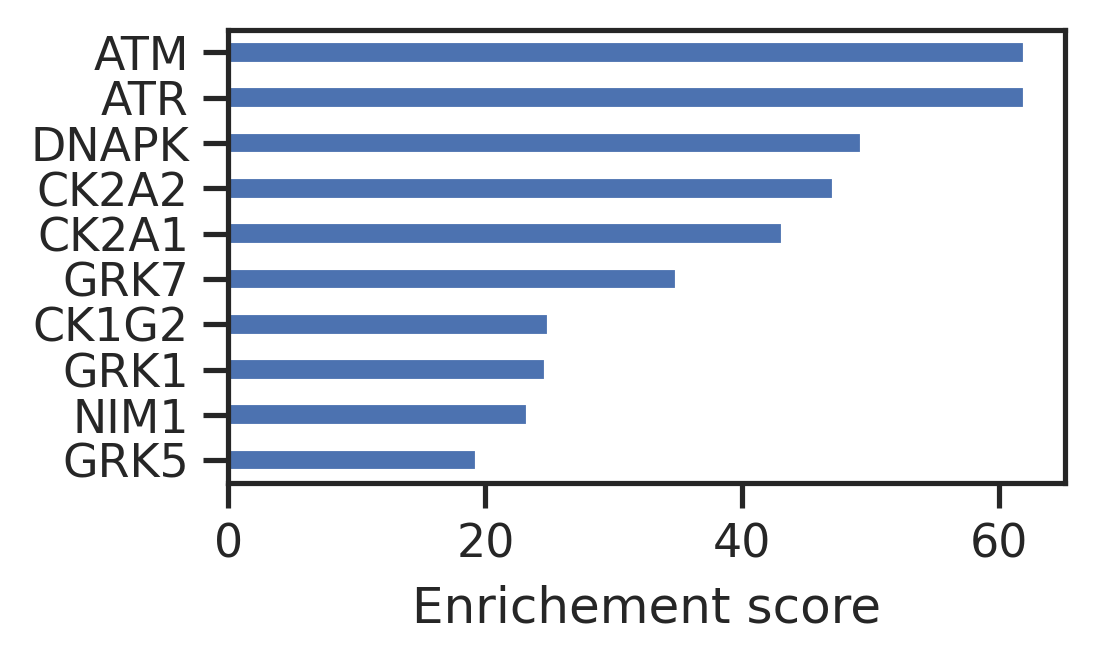

In [ ]:
enrich.tail(10).weighted_count.plot.barh(figsize=(3.6,2))
plt.xlabel('Enrichement score');